# part 1

(a)  For each vector/signal depicted in the left column, 1) draw a line connecting it with the plot
on the right of the magnitude of its (discrete) Fourier transform, and 2) write one sentence justifying
your answer in a high-level intuitive way (e.g. “The Fourier transform of random noise is usual BLAH,
and the plot at left looks like random noise and the plot at right looks like BLAH.”). So that you need
to look at the shapes of the plots, the scale on the y-axis of the plots in the right column have been
removed.

![image.png](Q1.png)

In [1]:
# ff = np.abs(fft(np.concatenate((np.zeros(5),np.sin(np.arange(0,np.pi,np.pi/10)),np.zeros(5)), axis=0)))
# plt.scatter(np.arange(0,len(ff)), ff)

$$F[m] = \sum_{j=0}^{N-1}f[j]e^{-2\pi imj/N}$$
* 1 -> 6 only contains direct component
* 2 -> 3 $e^{-2\pi i mj / n}$ magnitude is always 1
* 3 -> 2 consists of many $e^{-2\pi i mj / n}$, f[15] $\neq$ 0
* 4 -> 8 only F[15] = 2 
* 5 -> 1 many value are zeros
* 6 -> 7 
* 7 -> 3 random noise with f[0] > 0

# part 2

(a) ) Given a six-sided die, let p be a 6-tuple where p[i] denotes probability that i+1 appears.
Let q = p ∗ p ∗ · · · ∗ p
100 times
. What event occurs with probability q[150]? [Assume zero-index vectors.]

$$q = p * p * p ... * p = F^{-1}(F(p) \times F(p) \times  ... F(p))$$

In [14]:
import numpy as np
from scipy.fftpack import fft, ifft

In [40]:
# ifft(fft([1,1,1,0,0]) ** 2)
# ifft(fft([1,1,1,0,0,0]) ** 3)
# ifft(fft([1,1,1,1,1,1,0,0,0,0,0,0]) ** 2)
# ifft(fft([1,1,1,1,1,1,0,0,0,0,0]) ** 2)

array([ 1.+0.j,  2.+0.j,  3.+0.j,  2.+0.j,  1.+0.j])

In [48]:
array = np.zeros(600-99)
array[0:6] = np.ones(6) / 6
ifft(fft(array) ** 100)[150]

(4.7998478873774076e-10+0j)

(b) Given an N-tuple f, define f^+ to be the 2N-tuple obtained by padding f with zeros:
$$
f^+[i] = \begin{cases} f[i]~~~,& if 0 ≤ i ≤ N − 1\\
0,& if N ≤ i ≤ 2N − 1 \\\end{cases}
$$
Verify that convolution is multiplication under the Fourier transform: for any two N-tuples f and
g, show that
$$F(f ∗ g) = Ff^+ · Fg^+$$

where · denotes element-wise multiplication. [You should not just quote the lecture notes—you
must write out the calculation explicitly.] Suggest an implementation of convolution using the
Fast Fourier Transform and its inverse transform. What is the analogous conclusion you can make
when the two tuples have different lengths?

<font color='blue'> From the polynomial perspective, we know that 

$$Ff \cdot Fg = (f_0 + f_1x + f_2x^2 + ... + f_{n-1}x^{n-1})(g_0 + g_1x + g_2x^2 + ... + g_{n-1}x^{n-1})$$

$$Ff^+ \cdot Fg^+ =  (f_0 + f_1x + f_2x^2 + ... + f_{n-1}x^{n-1} + 0 x^n + 0 x^{n+1} + ... + 0 x^{2n-1})(g_0 + g_1x + g_2x^2 + ... + g_{n-1}x^{n-1} + 0 x^n + 0 x^{n+1} + ... + 0 x^{2n-1} = Ff \cdot Fg$$

$$\therefore F(f * g) = Fg \cdot Ff = F(f^+) \cdot F(g^+) $$

When the two tuples have different lengths, we need to pad then with zero until length $m + n - 1$

(c) Using the Fast Fourier Transform (and its inverse transform), write a method multiply(x, y)
that takes in two arrays of digits, each representing an integer (lower indices represent lower digits),
and return an array that represents the product of the two integers. For example, the output
of [0, 1, 2, 3] and [4, 5, 6] should be [0, 4, 3, 9, 9, 0, 2], representing the fact that 3, 210 × 654 =
2, 099, 340. Using your code, what is the product of the following two numbers:
x = 12345678901234567890, and y = 987654321098765432109876543210?
[For this part, please embed your actual code in the solution, instead of including it in the
appendix. Do not directly use convolution functions in your code.]

<font color='blue'> $$x \times y = F(F^{-1}x * F^{-1}y)$$

Note that, the Fourier transform takes a vector representation of a polynomial and returens the evaluation at the roots of unity, then the inverse transform takes a vector representing the values of $P_v$ evaluated a the troots of unity, and returns the coefficients of the polynomial $P_v$. 

In [109]:
def multiply(x,y):
    y = y[::-1]
    length = x.shape[0] + y.shape[0] - 1
    pad_x = np.zeros((length+y.shape[0]-1,1))
    pad_x[y.shape[0]-1:y.shape[0]-1+x.shape[0]] = x
    result = np.zeros((length+1,1))
    for i in range(length):
        result[i] = np.sum(pad_x[0+i:y.shape[0]+i] * y)
    for i in range(length):
        result[i+1] += result[i] // 10
        result[i] %= 10
    return result.reshape(-1)

In [110]:
multiply(np.array([0,1,2,3]).reshape(-1,1),\
         np.array([4,5,6]).reshape(-1,1))

array([ 0.,  4.,  3.,  9.,  9.,  0.,  2.])

In [111]:
multiply(np.array([1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0]).reshape(-1,1),\
         np.array([9,8,7,6,5,4,3,2,1,0,9,8,7,6,5,4,3,2,1,0,9,8,7,6,5,4,3,2,1,0]).reshape(-1,1))

array([ 9.,  6.,  2.,  5.,  3.,  6.,  2.,  1.,  1.,  1.,  1.,  0.,  8.,
        3.,  6.,  4.,  7.,  3.,  2.,  2.,  4.,  6.,  0.,  7.,  5.,  6.,
        9.,  4.,  2.,  2.,  5.,  9.,  7.,  1.,  2.,  0.,  7.,  3.,  1.,
        1.,  3.,  6.,  2.,  3.,  9.,  1.,  2.,  1.,  0.,  0.])

(d)  Compare the asymptotic run-time of this multiplication algorithm to that of the naive
grade-school integer multiplication algorithm. Feel

<font color='blue'> Suppose we multiply two integer with length $m,n$. Since multiplication is much more time consuming, here we merely consider  the time complexity of multiplication.
For Fast Fourier Transform, the asymptotic run-times is $O((m+n-1)\log(m+n-1))$ since we can use convolution operator to get the result directly and the convolution operator has $O((m+n-1)\log(m+n-1))$ time complexity. On the other hand, the naive grade-school inter multiplication need $O(mn)$ time complexity.

(e) (Bonus: 2 points) For your implementation for part (c), roughly how large can the inputs be for
the method to return accurate results? Justify your response via experiments and a discussion
of the Fourier transform and the known limitations of your program environment (i.e. number of
significant bits stored, etc.).
Deliverables: answer for (a); calcul

In [133]:
def createBigNumber(n):
    return np.ones((n,1)) * 9, Numpy2int(np.ones((n,1)) * 9)

def Numpy2int(result):
    return int(''.join(str(int(i)) for i in result[::-1]))

n = 100000
while True:
    print(n)
    a, i_a = createBigNumber(n)
    b, i_b = createBigNumber(n)
    result = multiply(a,b);
    assert Numpy2int(result) == i_a * i_b
    break

100000


<font color='blue'> The scale of the number is limited by the memory of the computer. Since my code is good enough, I could not find the exact number of significant bits that the output is not accurate. Since python can automatically extent the integer, integer overflow will never occur and therefore, the limitation of my program environment if the memory of the computer.

## Part 3

**The Sound of Fourier Transform.** In this part, we explore how Fourier transform can help us
understand human sounds. Last week, the Laurel/Yanny audio clip ignited the internet. Some people
hear the clip play as “Laurel” and some hear it as “Yanny”. Several news outlets have posted explanations
of the different perceptions, and made tools that let you perceive both interpretations. In this
problem, you’ll load the Laurel/Yanny audio clip, and process it in several ways that accentuate the
“Laurel” or “Yanny” perceptions.


(a) (0 points) Download and play the laurel/yanny recording. What do you hear? Most people hear
“Laurel” or “Yanny”/“Yarry” or both

<font color='blue'>
We hear "Yarry".

(b) (2 point) Load the signal into an array using the instructions above and plot the waveform/signal
that this 43,008 point array represents. (By plotting the array, you will have a plot where the
x-axis of the plot is time, and the y-axis is the physical position/displacement of the speaker
cone.)


44100 (43008,) [-315 -324 -331 ...,   23   22   29]


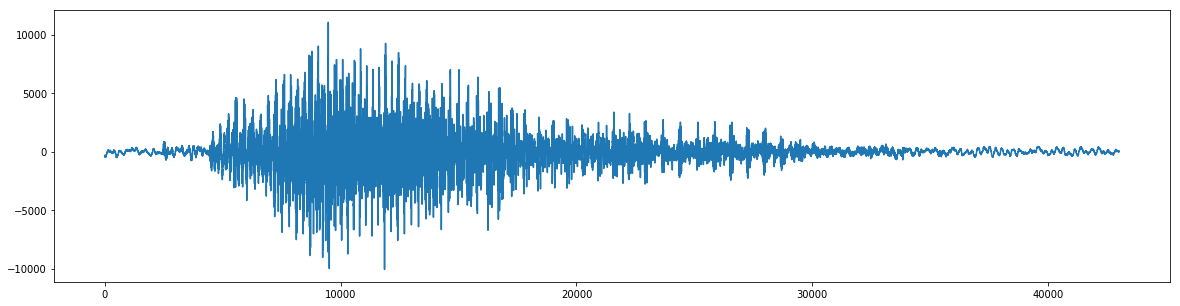

In [14]:
import scipy.io.wavfile as wavfile
import numpy as np
import matplotlib.pyplot as plt
with open("./laurel_yanny.wav", "rb") as f:
    sampleRate, data = wavfile.read(f)
    
print(sampleRate, data.shape, data)
plt.figure(figsize=[20, 5])
plt.plot(data)
plt.show()

(c) (4 point) Take the discrete Fourier transform of the signal, and plot the real number corresponding
to the magnitude of each coefficient of the Fourier transform. Describe what you see in words.
Why should you expect this?


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


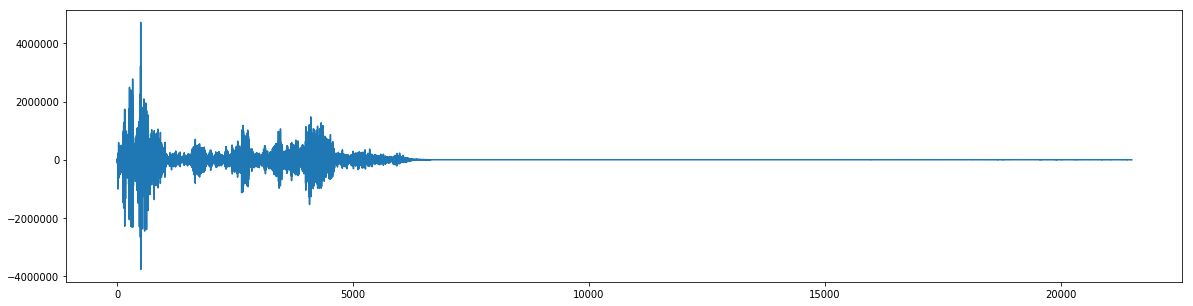

In [62]:
transformed = np.fft.fft(data)
plt.figure(figsize=[20, 5])
plt.plot(range(0, len(transformed)//2), transformed[0 : len(transformed)//2])  
plt.show()

<font color='blue'>
We can see that the intensity of low frequency is higher than that of high frequency.

(d) (6 points) Plot the “spectrogram” of the signal, which illustrates how the amount of high/low
frequencies change over the course of the audio clip. Specifically, chop the signal up into 500-
sample long blocks, and compute the Fourier transform for each chung. Plot a heatmap (in
Python, plt.imshow() with cmap=’hot’; in Matlab, imagesc()) where the x axis corresponds to
the index of the chunk, and the y values corresponds to frequencies, and the value at location x, y
corresponds to the magnitude of the yth Fourier coefficient for the xth chunk. Since frequencies
beyond the 80th Fourier coefficient are too high for humans to hear, the y-axis should just go
from 1 to 80. Turn in this spectogram—you should see some curious structure. (If the contrast
is too low to see clearly, you can make it higher by taking the square-root of each entry before
plotting it....)


(86, 500)
(80, 86)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys


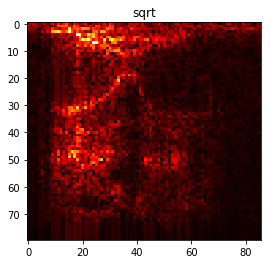

In [115]:
def heatmap(data):
    blocks = data[:len(data)-len(data)%500].reshape(-1, 500)
    print(blocks.shape)
    F_map = np.zeros((80, blocks.shape[0]))
    print(F_map.shape)
    for i, b in enumerate(blocks):
        F_map[:, i] = np.fft.fft(b)[:80]

    plt.title("sqrt")
    plt.imshow(np.sqrt(np.abs(F_map)), cmap='hot')


    plt.show()
    
heatmap(data)

<font color='blue'>
We can see the heat map look like a cat face. We can separate it into 2 part with a boundary on 20th frequency. We can see the lower frequency has a structure and higher one has another structure, which we think it would be the result of the illusion. Different people have different sensitive voice frequency, and the people hear "Laurel" should be the ones who have loewr sensitive range, and "Yarry/Yanny" ones have higher sensitive range.

(e) (6 points) You will now change the signal to sound more like “Laurel” or, more like “Yanny”. To
start, take the original audio, and try 1) zeroing out all “high” frequencies—frequencies above
a certain threshold t, and 2) zeroing out all frequencies below t. [This can be accomplished by
multiplying the Fourier transform of the signal by the thresholding function, then taking the
inverse Fourier transform.] Is there a threshold t such that the “low” frequency version sounds
like “Laurel” and the “high” frequency version sounds like “Yanny/Yarry” to you? If so, state
what this frequency is.


(86, 500)
(80, 86)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: ComplexWarning: Casting complex values to real discards the imaginary part
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys


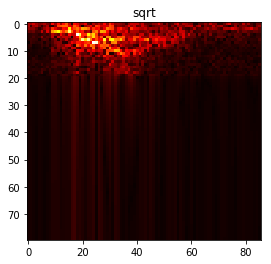

(86, 500)
(80, 86)


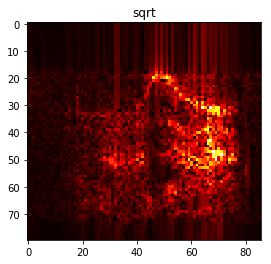

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


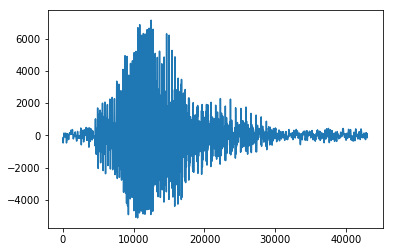

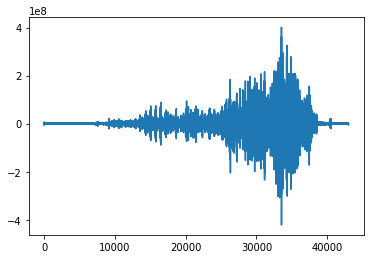

In [137]:
def separate(data, t):
    transformed = np.fft.fft(data)
    filter_ = np.zeros(transformed.shape[0])
    filter_[:t] = np.ones(t)
    filter_[-t:] = np.ones(t)
    lower_t = transformed * filter_
    higher_t = transformed * (1-filter_)
    return np.fft.ifft(lower_t), np.fft.fft(higher_t)

def save_wav(data, filename):
    data = (data * 1.0/np.max(np.abs(data))*32767).astype(np.int16)
    with open(filename+'.wav', "wb") as f:
        wavfile.write(f, sampleRate, data)
        
l, h = separate(data, 1600)
save_wav(l, 'l')
save_wav(h, 'h')


heatmap(l)
heatmap(h)

plt.plot(l)
plt.show()
plt.plot(h)
plt.show()

<font color='blue'>
When we try $t=1600$ to separate the high frequency part and the low requency part. From the heat map of the result we can see that the frequency of blocks has been separate into higher and lower part. The both heat map have kept the structure of the origin one, and voice are separate into two part. The low frequency part and the high frequency part. When we save the two result separately, we can hear the lower part sounds like "Laurel" clearly, and the higher part sounds like "Yarry" but ambiguously because of the higher frequency that our human could hardly hear. 

(f) (5 point bonus) Can you find other ways of bringing out the Laurel or Yanny in the original audio?
You can experiment with modifying the Fourier transform in more complicated ways, including
fancier scalings, as well as things like translating the Fourier transform (i.e. appending zeros to
the beginning, or removing the first set of values), etc. Discuss any especially effective approaches
that you discovered.


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: ComplexWarning: Casting complex values to real discards the imaginary part
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys


(86, 500)
(80, 86)


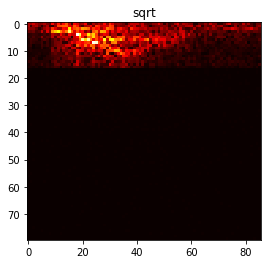

(86, 500)
(80, 86)


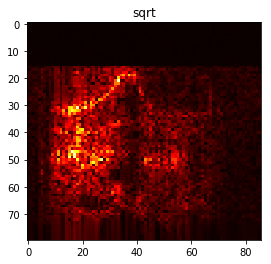

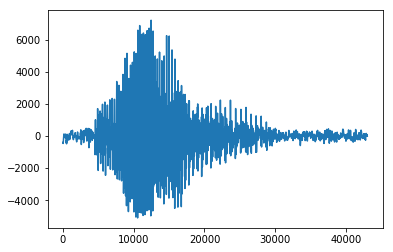

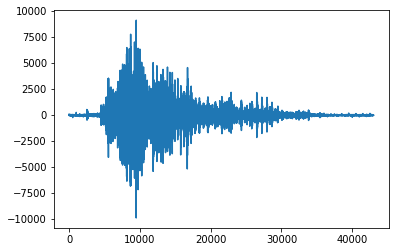

In [142]:
def separate2(data, t, block_size=500):
    blocks = data[:len(data)-len(data)%block_size].reshape(-1, block_size)
    filter_ = np.zeros(np.fft.fft(blocks[0]).shape[0])
    filter_[:t] = np.ones(t)
    filter_[-t:] = np.ones(t)
    
    low = np.zeros_like(data)
    high = np.zeros_like(data)
    
    for i, b in enumerate(blocks):
        F = np.fft.fft(b)
        low[block_size*i:block_size*(i+1)] = np.fft.ifft(F * filter_)
        high[block_size*i:block_size*(i+1)] = np.fft.ifft(F * (1-filter_))
        
    return low, high

l, h = separate2(data, 16,500)
save_wav(l, 'l2')
save_wav(h, 'h2')


heatmap(l)
heatmap(h)

plt.plot(l)
plt.show()
plt.plot(h)
plt.show()

<font color='blue'>
We try to filter the voice with n-sample long blocks rather than filter on whole voice. In part(e), we filter the Fourier transformed data on the whole wav, and we can see there are little deformation of the heatmap, especially the higher frequency one, and the frequency is not separate well in different blocks. By filter the wav file with 500-sample long blocks, and separate with threshold $t=16$, get 'l2.wav' and 'h2.wav' which sound 'Laurel' and 'yanny' clearly. 